In [1]:
import logging
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

from pathlib import Path

from experiments.tad_help import RTRunner

%load_ext autoreload
%autoreload 2

# Disable logging of the program in the notebook
os.environ["LOGLEVEL"] = "CRITICAL"

logging.basicConfig()
logging.root.setLevel(logging.CRITICAL)
logging.basicConfig(level=logging.CRITICAL)

logger = logging.getLogger('__main__')
logger.setLevel(os.environ.get("LOGLEVEL", logging.CRITICAL))

pybooklogger = logging.getLogger('pybook')
pybooklogger.setLevel(logging.CRITICAL)

%aimport setup

from setup import *

# Track Layout
Calculate the layout of the dutch railway system


In [3]:
layout_file =   "../data/prorail/parsed/netherlands-schiphol.json"
layout = Layout(layout_file)

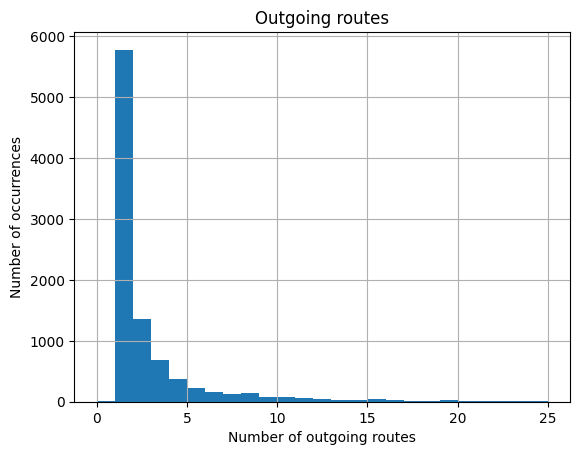

In [4]:
edges_df = pd.DataFrame({"Outgoing routes": [len(n.outgoing) for n in layout.g_block.nodes.values() if len(n.outgoing) <= 25]})
hist = edges_df.hist(bins=25, )
plt.xlabel("Number of outgoing routes")
plt.ylabel("Number of occurrences")
plt.show()

# Experiment Runtime
Take a route of an agent with many stops, and run from start to every stop as an experiment

In [3]:
scenario_files = Path("../data/prorail/scenarios/RT")
save_dir = r"C:\Users\erick\Documents\uni\Thesis\delay-replannning\experiments\results\rt"

..\data\prorail\scenarios\RT\2025-07-22_1.json


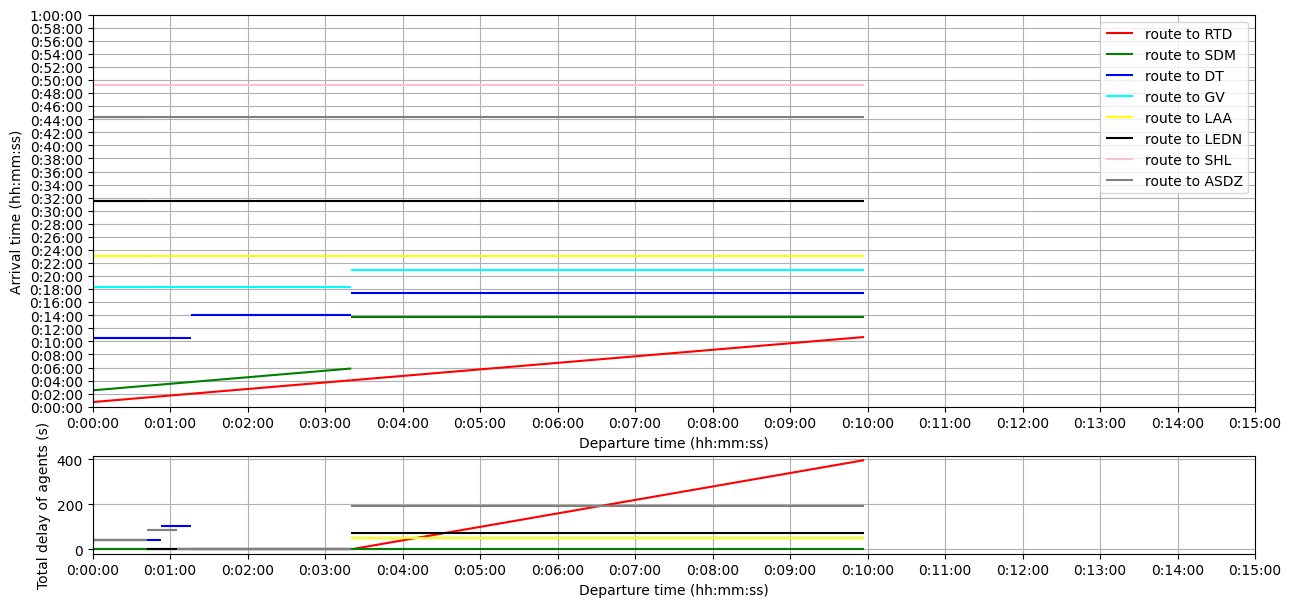

..\data\prorail\scenarios\RT\2025-07-18_1.json


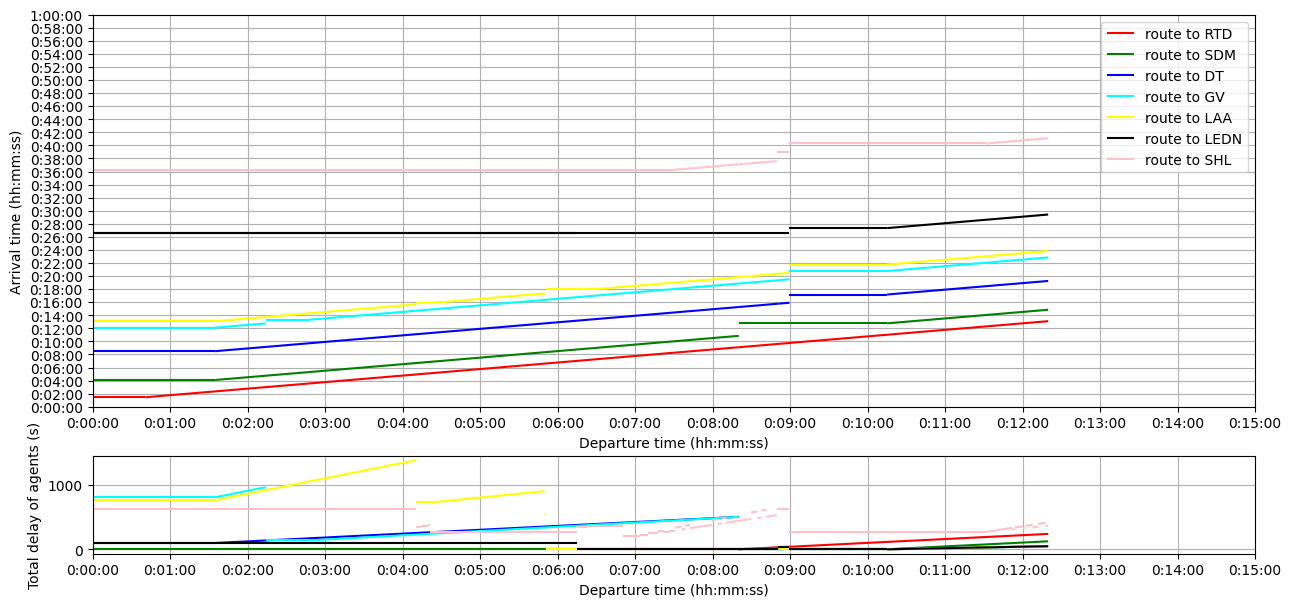

..\data\prorail\scenarios\RT\2025-07-03.json


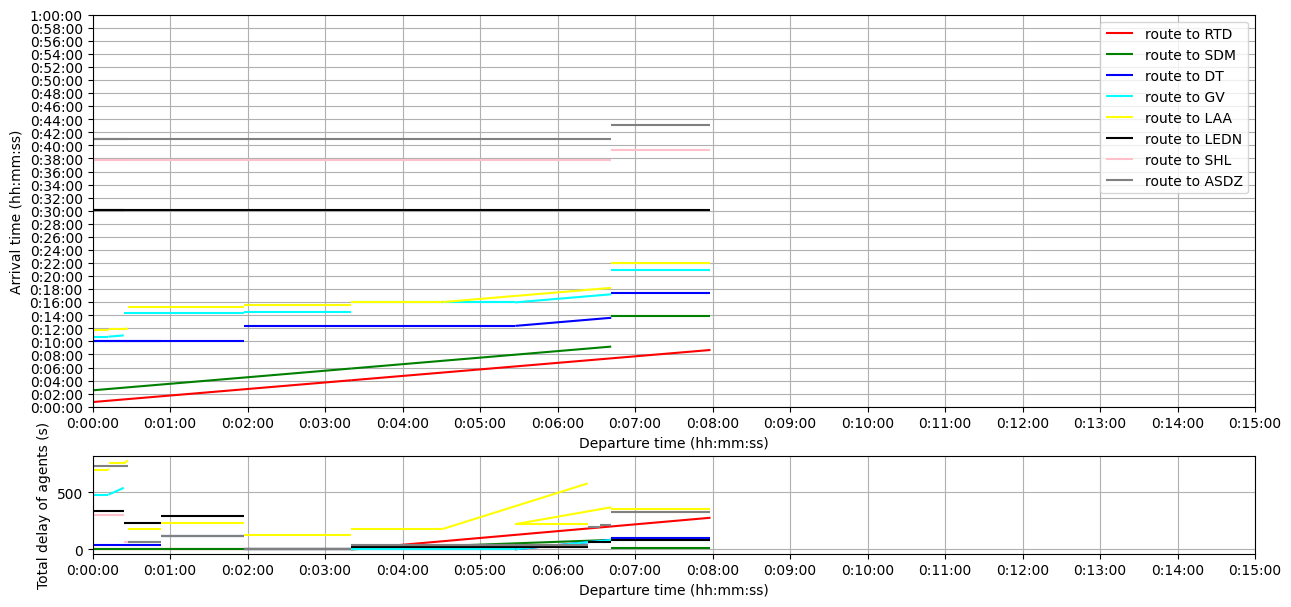

..\data\prorail\scenarios\RT\2025-07-18_2.json


In [ ]:
i_save_dir = Path(save_dir) / "intermediates"
Path(i_save_dir).mkdir(parents=True, exist_ok=True)

processed = {file.split(".csv")[0] for file in os.listdir(i_save_dir)}

unprocessed_scenarios = set(os.listdir(scenario_files)) - processed
# unprocessed_scenarios ={r"2025-07-22_1.json"}
for scenario_file in unprocessed_scenarios:
    try:
        rt_exp = RTRunner(layout, scenario_files / scenario_file, save_dir)
        experiments = rt_exp.run("3500", "o", "RTB", "ASDZ", timeout=1200)
        path_df = rt_exp.get_path_df(experiments)
        path_df.to_csv(i_save_dir / f"{scenario_file}.csv")

        kwargs = {"min_x": 0, "max_x": 900,
                  "min_y": 0, "max_y": 3600}
        experiments[0].metadata = {'color': "Red",    'label': 'route to RTD',  'offset': 0, 'linestyle': 3}
        experiments[1].metadata = {'color': "Green",  'label': 'route to SDM',  'offset': 0, 'linestyle': 3}
        experiments[2].metadata = {'color': "Blue",   'label': 'route to DT',   'offset': 0, 'linestyle': 3}
        experiments[3].metadata = {'color': "Cyan",   'label': 'route to GV',   'offset': 0, 'linestyle': 3}
        experiments[4].metadata = {'color': "Yellow", 'label': 'route to LAA',  'offset': 0, 'linestyle': 3}
        experiments[5].metadata = {'color': "Black",  'label': 'route to LEDN', 'offset': 0, 'linestyle': 3}
        experiments[6].metadata = {'color': "Pink",   'label': 'route to SHL',  'offset': 0, 'linestyle': 3}
        experiments[7].metadata = {'color': "Gray",   'label': 'route to ASDZ', 'offset': 0, 'linestyle': 3}
        plot_experiments(experiments, **kwargs)
    except KeyboardInterrupt:
        raise
    except Exception as e:
        print(e)

In [142]:
save_path = Path(save_dir)
dfs = []

for file in (save_path / "intermediates").iterdir():
    df = pd.read_csv(file, index_col=0)
    if len(df) >= 8:
        dfs.append(df)

df = pd.concat(dfs, axis=0, keys=list(range(len(dfs))))
df.index = df.index.map(lambda x: (x[0], x[1].split("|")[0]))
df["Adjusted Search Time"] = df["Search Time"] / df["Total paths"]
df = df.drop(columns=["atfs", "paths"])
df

Average path length  Total paths  nodes generated  \
0 route to RTD              3.000000            4               15   
  route to SDM             10.400000            5              138   
  route to DT              20.166667            6              501   
  route to GV              28.875000            8              722   
  route to LAA             31.916667           12             1074   
  route to LEDN            44.714286            7             4153   
  route to SHL             65.000000            8             3978   
  route to ASDZ            73.875000            8             4145   
1 route to RTD              3.000000            4               19   
  route to SDM             10.000000            6               91   
  route to DT              21.000000            8              181   
  route to GV              30.000000            7              298   
  route to LAA             33.000000           10              574   
  route to LEDN            44.666667            3            11022   
  route to SHL             65.692308           65             8739   
  route to ASDZ            74.718310           71             9406   
2 route to RTD              3.000000            4               16   
  route to SDM             10.000000            6              106   
  route to DT              21.000000            4              363   
  route to GV              30.000000            5              907   
  route to LAA             32.153846           13              971   
  route to LEDN            43.307692           13             1459   
  route to SHL             65.452830           53             6562   
  route to ASDZ            73.943925          107            12673   
3 route to RTD              3.000000            4               19   
  route to SDM             10.400000            5              329   
  route to DT              20.166667           24              513   
  route to GV              29.034483           58             3325   
  route to LAA             30.461538           26             1178   
  route to LEDN            41.395349          215            16311   
  route to SHL             61.432432           74            14843   
  route to ASDZ            71.141414           99            19270   
4 route to RTD              3.000000            4               10   
  route to SDM             10.000000            3               95   
  route to DT              19.750000            4              387   
  route to GV              28.750000            4              617   
  route to LAA             31.750000            4             1209   
  route to LEDN            44.333333            3             2034   
  route to SHL             64.750000            4             2649   
  route to ASDZ            73.750000            4             1977   

                 nodes decreased  nodes expanded  Search Time  \
0 route to RTD                 1               5        0.418   
  route to SDM                16              36       13.344   
  route to DT                 71             220       53.367   
  route to GV                 99             342       65.514   
  route to LAA               193             489      105.631   
  route to LEDN             1165            1873      506.964   
  route to SHL               886            1767      475.326   
  route to ASDZ              843            1824      467.890   
1 route to RTD                 2               5        0.464   
  route to SDM                11              28        2.704   
  route to DT                 15              81        4.937   
  route to GV                 30             167        9.419   
  route to LAA                83             231       24.053   
  route to LEDN             2124           10134      662.847   
  route to SHL              1755            3319      549.685   
  route to ASDZ             2056            3803      597.194   
2 route to RTD                 3         

,Average path length,Search Time,std,Adjusted Search Time,Adjusted std
route to RTD,3.000000,0.4460,0.059716,0.111500,0.014929
route to SDM,10.160000,9.6272,6.608341,2.073787,1.384344
route to DT,20.416667,30.4468,17.877177,5.613033,4.416230
route to GV,29.331897,74.3066,62.672941,7.757120,5.842900
route to LAA,31.856410,87.1736,46.852809,11.652957,14.984591
route to LEDN,43.683465,436.8346,282.168163,73.623037,88.234173
route to SHL,64.465514,500.2304,289.926871,28.176881,26.423827
route to ASDZ,73.485730,555.5728,313.498922,25.221755,24.415615


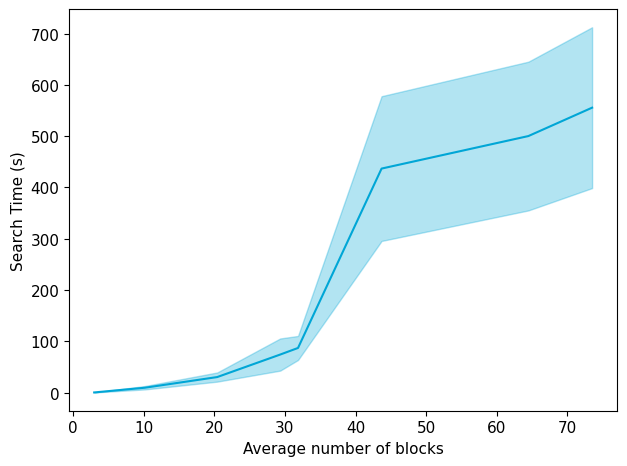

In [143]:

mean_df = df.groupby(level=1).mean().sort_values("Average path length", ascending=True)
mean_df["std"] = df.groupby(level=1).std()["Search Time"]
mean_df["Adjusted std"] = df.groupby(level=1).std()["Adjusted Search Time"]
mean_df = mean_df[["Average path length", "Search Time", "std", "Adjusted Search Time", "Adjusted std"]]
x = mean_df.set_index("Average path length")
plt.rcParams.update({'font.size': 11})
adjusted = ""
ax = x[f"{adjusted}Search Time"].plot(color="#00A6D6")
ax.fill_between(x.index, x[f"{adjusted}Search Time"] - x[f"{adjusted}std"] / 2, x[f"{adjusted}Search Time"] + x[f"{adjusted}std"] / 2, color="#00A6D6", alpha=0.3)
plt.ylabel("Search Time (s)")
plt.xlabel("Average number of blocks")
plt.tight_layout()
plt.savefig(save_path / "search_time.png")
mean_df

[0.00133818 0.28638544]


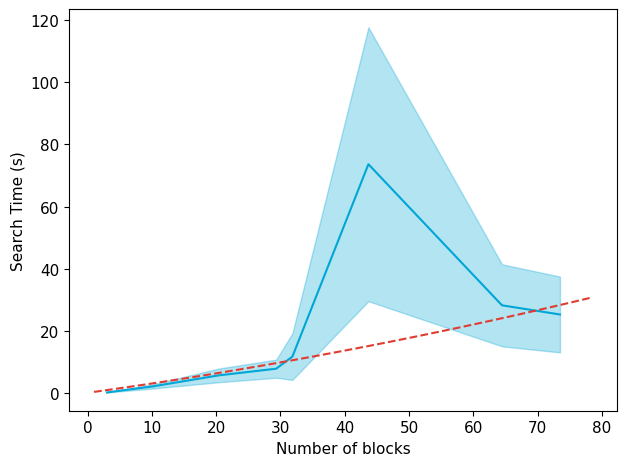

In [144]:
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots()

adjusted = "Adjusted "

df2 = mean_df.set_index("Average path length").drop(index=mean_df.loc["route to LEDN"]["Average path length"])

x2 = df2.index
y = df2[f"{adjusted}Search Time"]
std = df2[f"{adjusted}std"]

def func2(x, a, b):
    return a * x ** 2 + b * x

func = func2

popt, pcov = curve_fit(func, x2, y)

print(popt)

x3 = np.linspace(1, x2.max() + 5)

ax = x[f"{adjusted}Search Time"].plot(color="#00A6D6")
ax.fill_between(x.index, x[f"{adjusted}Search Time"] - x[f"{adjusted}std"] / 2, x[f"{adjusted}Search Time"] + x[f"{adjusted}std"] / 2, color="#00A6D6", alpha=0.3)
_ = ax.plot(x3,  func(x3, *popt), '--', color="#E03C31")
# time_df.loc[time_df["Search Time"] > -1]["Search Time"].plot()
plt.ylabel("Search Time (s)")
plt.xlabel("Number of blocks")
plt.tight_layout()
plt.savefig(str(save_path / "search_time_normalized_fitted.png"))